<a href="https://colab.research.google.com/github/IdhamAbidinKaisilay/BelajarDataAnalyst/blob/main/Line_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
plt.style.use('ggplot')

#Line Plot
Line plot adalah grafik garis yang digunakan untuk melihat bagaimana suatu nilai berubah dari waktu ke waktu.

In [6]:
path = '/content/drive/MyDrive/Data Analyst 2025 + SQL + Excel/Section 16: Pandas - Visualisasi Data/MISSION+13+FILES/dummy_ojol_transactions.csv'
df = pd.read_csv(path, sep=';')
df.head(3)

,id,date_order,date_finished,mode,from_alamat,from_kelurahan,from_kecamatan,from_lat,from_lng,to_alamat,to_kelurahan,to_kecamatan,to_lat,to_lng,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,customer_name,customer_gender,customer_birthdate,driver_id,driver_name,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1617,09/03/2019 20.45,09/03/2019 22.05,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277","109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,061345224","109,305406","5,55",2500,0,2500,67,Dian Aryani,P,02/05/1994,90,Rusman Situmorang,L,24/03/1997,MOTOR,Yamaha,NaN,NaN,NaN
1,1297,09/03/2019 19.55,10/03/2019 01.38,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,02861","109,329253","Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,"-0,028571215","109,3749533","7,08",9000,82000,91000,55,Ajimin Aditya Pangestu,L,22/04/2004,77,Lukman Ganep Januar M.Ak,L,26/07/1976,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,1394,09/03/2019 19.54,09/03/2019 21.44,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,"-0,0301863","109,3356331","Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,"-0,022623361","109,3191522","4,02",5000,58500,63500,68,Wahyu Simanjuntak,L,01/07/2000,75,Atma Dasa Uwais,L,28/12/1985,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN


In [ ]:
df.info()

In [11]:
# Karena date_order bertipe data object maka kita perlu mengubahnya dulu menjadi tipe data datime64[ns].
df['date_order'] = pd.to_datetime(df['date_order'], format='%d/%m/%Y %H.%M', errors='coerce')

# buat kolom baru bernama 'date' yang berisi tanggal nya saja
df['date'] = df['date_order'].dt.date

df.head(1)

,id,date_order,date_finished,mode,from_alamat,from_kelurahan,from_kecamatan,from_lat,from_lng,to_alamat,to_kelurahan,to_kecamatan,to_lat,to_lng,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,customer_name,customer_gender,customer_birthdate,driver_id,driver_name,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category,date
0,1617,2019-03-09 20:45:00,09/03/2019 22.05,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277","109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,061345224","109,305406","5,55",2500,0,2500,67,Dian Aryani,P,02/05/1994,90,Rusman Situmorang,L,24/03/1997,MOTOR,Yamaha,NaN,NaN,NaN,2019-03-09


In [19]:
df.groupby(by='date')['transaction_amount_total'].sum()

,transaction_amount_total
date,
2018-09-10,308500
2018-09-11,147000
2018-09-12,15000
2018-09-13,117100
2018-09-15,18700
...,...
2019-03-05,98700
2019-03-06,31700
2019-03-07,116600


<Axes: xlabel='date'>

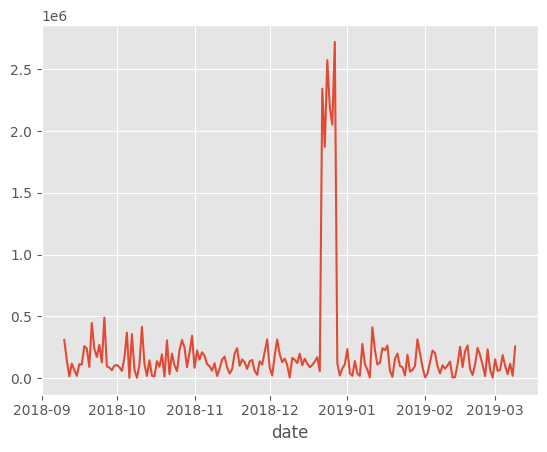

In [18]:
df.groupby(by='date')['transaction_amount_total'].sum().plot(kind='line')